## Lecture Note

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

e:\conda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df[['job_title_short','job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [8]:
df_exploded = df.explode('job_skills')
# df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
skills_count = df_exploded.groupby(['job_skills','job_title_short']).size()

In [12]:
df_skills_counts = skills_count.reset_index(name='skill_count')

In [23]:
df_skills_counts = df_skills_counts.sort_values(by='skill_count', ascending=False)
df_skills_counts
job_title = 'Data Engineer'
top_skills = 15

df_skill_final = df_skills_counts[df_skills_counts['job_title_short'] ==job_title].head(top_skills)

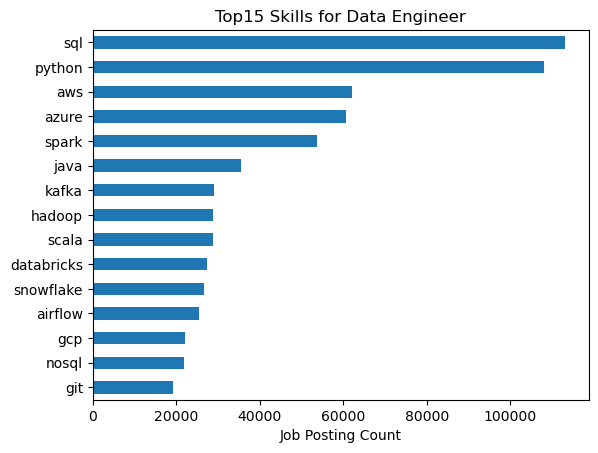

In [31]:
df_skill_final.plot(kind='barh',x='job_skills',y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top{top_skills} Skills for {job_title}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

## Homework

In [33]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

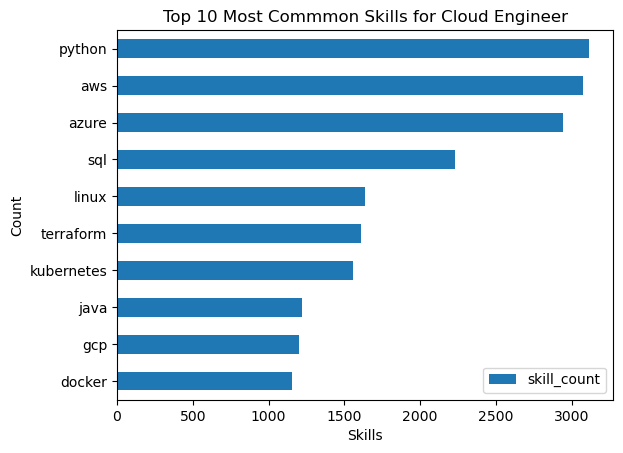

In [94]:
# df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)
df_exploded = df.explode('job_skills')
job_title = 'Cloud Engineer'
top_skills = 10
df_job = df_exploded[df_exploded['job_title_short']==job_title]
skill_count = df_job.groupby(['job_title_short','job_skills']).size().reset_index(name='skill_count').sort_values(by='skill_count',ascending=False)
skill_count.head(top_skills).plot(kind='barh',x='job_skills',y='skill_count')
plt.gca().invert_yaxis()
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title(f'Top {top_skills} Most Commmon Skills for {job_title}')
plt.show()




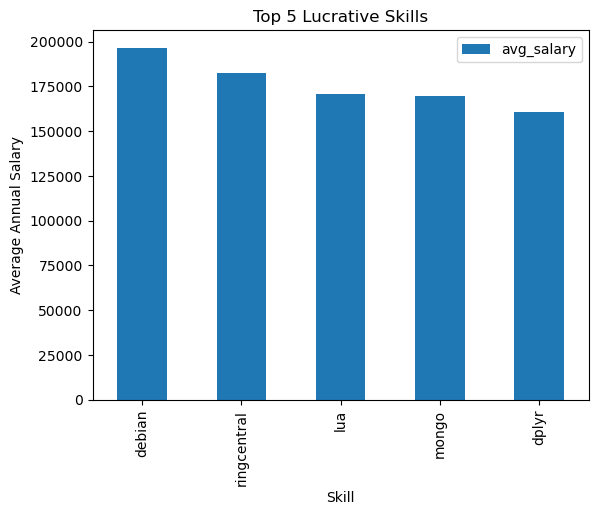

In [108]:
df_salary_exploded = df.explode('job_skills')
skill_salary = (
    df_salary_exploded.groupby('job_skills')['salary_year_avg'].mean()
    .sort_values(ascending=False)
    .reset_index(name='avg_salary')
    .head()
)
skill_salary.plot(kind='bar',x='job_skills',y='avg_salary')
plt.xlabel('Skill')
plt.ylabel('Average Annual Salary')
plt.title('Top 5 Lucrative Skills')
plt.show()

In [130]:
df_exploded = df.explode('job_skills')
df_size = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index(name='num_unique_skills').sort_values(by='num_unique_skills',ascending=False)
df_size.head()


,job_title_short,num_unique_skills
9,Software Engineer,239
3,Data Engineer,239
4,Data Scientist,237
2,Data Analyst,235
7,Senior Data Engineer,226
